In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt


** combine data **

In [ ]:
import pandas as pd
import os

# Path to the directory containing the CSV files
directory_path = './solar_data/ambientais'

# List to store DataFrames
df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Read each CSV file
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('solar_data/combined_ambientais_data.csv', index=False)

print("All CSV files have been combined into combined_ambientais_data.csv")


In [ ]:
import pandas as pd
import os

# Path to the directory containing the CSV files
directory_path = './solar_data/inversor'

# List to store DataFrames
df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Read each CSV file
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('solar_data/combined_inversor_data.csv', index=False)

print("All CSV files have been combined into combined_inversor_data.csv")

In [ ]:
import pandas as pd

# Load the CSV file
file_path = './solar_data/combined_ambientais_data.csv'
df = pd.read_csv(file_path)

# Define a function to check for valid time values
def is_valid_time(time_str):
    hour = int(time_str[:2])
    minute = int(time_str[2:4])
    second = int(time_str[4:])
    return (0 <= hour < 24) and (0 <= minute < 60) and (0 <= second < 60)

# Filter out rows with invalid time values
df['hora_minuto'] = df['hora_minuto'].astype(int).astype(str).str.zfill(6)
df = df[df['hora_minuto'].apply(is_valid_time)]

# Define a function to transform the columns into a timestamp
def create_timestamp(row):
    # Extract year, month, day
    date_str = str(row['dia_mes_ano'])
    year = date_str[:4]
    month = date_str[4:6]
    day = date_str[6:8]
    
    # Ensure the time is in integer format and then to a string with zero-padding
    time_str = row['hora_minuto']  # Ensure the time is in HHMMSS format
    hour = time_str[:2]
    minute = time_str[2:4]
    second = time_str[4:]
    
    # Combine into a single datetime string
    datetime_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
    
    # Convert to datetime object
    return pd.to_datetime(datetime_str, format="%Y-%m-%d %H:%M:%S")

# Apply the function to each row to create a new 'timestamp' column
df['timestamp'] = df.apply(create_timestamp, axis=1)

# Save the modified DataFrame to a new CSV file
output_path = './solar_data/combined_ambientais_data_with_timestamp.csv'
df.to_csv(output_path, index=False)

print(f"The DataFrame with the new 'timestamp' column has been saved to {output_path}")


In [ ]:
import pandas as pd

# Load the CSV file
file_path = './solar_data/combined_inversor_data.csv'
df = pd.read_csv(file_path)

# Define a function to check for valid time values
def is_valid_time(time_str):
    hour = int(time_str[:2])
    minute = int(time_str[2:4])
    second = int(time_str[4:])
    return (0 <= hour < 24) and (0 <= minute < 60) and (0 <= second < 60)

# Filter out rows with invalid time values
df['hora_minuto'] = df['hora_minuto'].astype(int).astype(str).str.zfill(6)
df = df[df['hora_minuto'].apply(is_valid_time)]

# Define a function to transform the columns into a timestamp
def create_timestamp(row):
    # Extract year, month, day
    date_str = str(row['dia_mes_ano'])
    year = date_str[:4]
    month = date_str[4:6]
    day = date_str[6:8]
    
    # Ensure the time is in integer format and then to a string with zero-padding
    time_str = row['hora_minuto']  # Ensure the time is in HHMMSS format
    hour = time_str[:2]
    minute = time_str[2:4]
    second = time_str[4:]
    
    # Combine into a single datetime string
    datetime_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
    
    # Convert to datetime object
    return pd.to_datetime(datetime_str, format="%Y-%m-%d %H:%M:%S")

# Apply the function to each row to create a new 'timestamp' column
df['timestamp'] = df.apply(create_timestamp, axis=1)

# Save the modified DataFrame to a new CSV file
output_path = './solar_data/combined_inversor_data_with_timestamp.csv'
df.to_csv(output_path, index=False)

print(f"The DataFrame with the new 'timestamp' column has been saved to {output_path}")


In [ ]:
import pandas as pd

# Load the first CSV file
ambientais_data_path = './solar_data/combined_ambientais_data_with_timestamp.csv'
ambientais_df = pd.read_csv(ambientais_data_path)

# Load the second CSV file
inversor_data_path = './solar_data/combined_inversor_data_with_timestamp.csv'
inversor_df = pd.read_csv(inversor_data_path)

# Merge the dataframes on the 'timestamp' column
merged_df = pd.merge(ambientais_df, inversor_df, on='timestamp', suffixes=('_ambientais', '_inversor'))

# Save the merged dataframe to a new CSV file
output_path = './solar_data/merged_ambientais_inversor_data.csv'
merged_df.to_csv(output_path, index=False)

print(f'Merged data saved to {output_path}')


In [ ]:
output_path = './solar_data/merged_ambientais_inversor_data.csv'

df = pd.read_csv(output_path)


In [ ]:
df = df.drop(columns=['dia_mes_ano_ambientais', 'hora_minuto_ambientais'])


In [ ]:
null_values = df.isnull().sum()
print(null_values)

In [ ]:
# Remove rows with any null values
df = df.dropna()

# Display the count of null values for each column after cleaning
null_values_after = df.isnull().sum()
print("\nNull values after cleaning:")
print(null_values_after)

In [ ]:
output_path = './solar_data/combined_data_final.csv'
df.to_csv(output_path, index=False)

In [ ]:
import pandas as pd
import numpy as np

def clean_temperature(df, anomaly_value=-127.0):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
    
    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    
    # Find indices where temperature equals the anomaly value
    anomaly_indices = df_cleaned.index[df_cleaned['temp'] == anomaly_value]
    
    for idx in anomaly_indices:
        # Get the temperatures of the previous and next rows
        prev_temp = df_cleaned.loc[df_cleaned.index < idx, 'temp'].iloc[-1] if idx > df_cleaned.index[0] else np.nan
        next_temp = df_cleaned.loc[df_cleaned.index > idx, 'temp'].iloc[0] if idx < df_cleaned.index[-1] else np.nan
        
        # Check if both prev_temp and next_temp are not equal to the anomaly value
        if prev_temp != anomaly_value and next_temp != anomaly_value:
            # Calculate the average, ignoring NaN values
            avg_temp = np.nanmean([prev_temp, next_temp])
            
            # Replace the anomaly with the calculated average
            df_cleaned.at[idx, 'temp'] = avg_temp
        # If either prev_temp or next_temp is the anomaly value, we skip this row
    
    return df_cleaned

# Load the CSV file
file_path = './solar_data/combined_data_final.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Clean the temperature data
df_cleaned = clean_temperature(df)

# Save the cleaned data to a new CSV file
output_file_path = 'cleaned_dataset.csv'  # You can change this name if you want
df_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned data has been saved to {output_file_path}")

In [ ]:
def clean_temperature_two_consecutive(df, anomaly_value=-127.0):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
    
    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    
    # Reset index to ensure continuous integer indexing
    df_cleaned = df_cleaned.reset_index(drop=True)
    
    # Iterate through the dataframe
    i = 0
    while i < len(df_cleaned) - 1:
        if df_cleaned.at[i, 'temp'] == anomaly_value and df_cleaned.at[i+1, 'temp'] == anomaly_value:
            # Found two consecutive anomalies
            prev_temp = df_cleaned.at[i-1, 'temp'] if i > 0 else np.nan
            next_temp = df_cleaned.at[i+2, 'temp'] if i+2 < len(df_cleaned) else np.nan
            
            # Check if prev_temp and next_temp are not anomalies
            if prev_temp != anomaly_value and next_temp != anomaly_value:
                avg_temp = np.nanmean([prev_temp, next_temp])
                df_cleaned.at[i, 'temp'] = avg_temp
                df_cleaned.at[i+1, 'temp'] = avg_temp
            
            i += 2  # Skip the next row as we've already processed it
        else:
            i += 1
    
    return df_cleaned

# Load the CSV file
file_path = 'cleaned_dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Clean the temperature data
df_cleaned = clean_temperature_two_consecutive(df)

# Save the cleaned data to a new CSV file
output_file_path = 'cleaned_datasetV2.csv'  # You can change this name if you want
df_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned data has been saved to {output_file_path}")

Since the respective anomalies is all consecutive -127 so we suggest to delete to prevent bias data 

In [ ]:
df = df_cleaned
rows_with_temp_minus_127 = df[df['temp'] == -127]
print(rows_with_temp_minus_127['temp'])
# Remove rows where the temp column has a value of -127
df = df[df['temp'] != -127]


In [ ]:

print(df[df['temp'] == -127])

In [ ]:
# Save the cleaned data to a new CSV file
output_file_path = 'clean_final.csv'  # You can change this name if you want
df.to_csv(output_file_path, index=False)

In [ ]:

df = pd.read_csv('clean_final.csv')

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temp'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Time Series Plot of Temperature')
plt.grid(True)
plt.show()

In [ ]:
def clean_temperature(df, anomaly_value=15):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
    
    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    
    # Find indices where temperature equals the anomaly value
    anomaly_indices = df_cleaned.index[df_cleaned['temp'] <= anomaly_value]
    
    for idx in anomaly_indices:
        # Get the temperatures of the previous and next rows
        prev_temp = df_cleaned.loc[df_cleaned.index < idx, 'temp'].iloc[-1] if idx > df_cleaned.index[0] else np.nan
        next_temp = df_cleaned.loc[df_cleaned.index > idx, 'temp'].iloc[0] if idx < df_cleaned.index[-1] else np.nan
        
        # Check if both prev_temp and next_temp are not equal to the anomaly value
        if prev_temp != anomaly_value and next_temp != anomaly_value:
            # Calculate the average, ignoring NaN values
            avg_temp = np.nanmean([prev_temp, next_temp])
            
            # Replace the anomaly with the calculated average
            df_cleaned.at[idx, 'temp'] = avg_temp
        # If either prev_temp or next_temp is the anomaly value, we skip this row
    
    return df_cleaned

# # Load the CSV file
# file_path = 'cleaned_dataset.csv'  # Replace with your actual file path
# df = pd.read_csv(file_path)
df_clean = df
# Clean the temperature data
df_cleaned = clean_temperature(df_clean)
df_cleaned = clean_temperature(df_cleaned)


# # Save the cleaned data to a new CSV file
# output_file_path = 'cleaned_datasetV2.csv'  # You can change this name if you want
# df_cleaned.to_csv(output_file_path, index=False)

# print(f"Cleaned data has been saved to {output_file_path}")

In [ ]:
# Ensure the timestamp column is in datetime format
df = df_cleaned
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temp'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Time Series Plot of Temperature')
plt.grid(True)
plt.show()

In [ ]:
df = df.drop(columns=['dia_mes_ano_inversor', 'hora_minuto_inversor'])


In [ ]:
output_path = 'data_temp_clean.csv'
df.to_csv(output_path, index=False)

Finished the temparature clean process

In [ ]:
df = pd.read_csv('data_temp_clean.csv')

In [ ]:
# Ensure the timestamp column is in datetime format
df
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['massaPM1'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('massaPM1')
plt.title('Time Series Plot of massaPM1')
plt.grid(True)
plt.show()

In [ ]:
df.columns

In [ ]:
# Set display options to show all rows
# pd.set_option('display.max_rows', None)

# Find rows where the massaPM1 column has values higher than 100
rows_with_high_massaPM1 = df[df['massaPM1'] > 100]

# Display all rows
rows_with_high_massaPM1

From here we can see the massaPM1 have one is a spike which is row 110810 with value 165.04	

In [ ]:
def clean_massaPM1(df, anomaly_value):
    df_cleaned = df.copy()

    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    anomaly_indices = df_cleaned.index[df_cleaned['massaPM1'] == anomaly_value]
        
    for idx in anomaly_indices:
        # Get the massaPM1 of the previous and next rows
        prev = df_cleaned.loc[df_cleaned.index < idx, 'massaPM1'].iloc[-1] if idx > df_cleaned.index[0] else np.nan
        next = df_cleaned.loc[df_cleaned.index > idx, 'massaPM1'].iloc[0] if idx < df_cleaned.index[-1] else np.nan
        
        # Check if both prev_temp and next_temp are not equal to the anomaly value
        if prev != anomaly_value and next != anomaly_value:
            # Calculate the average, ignoring NaN values
            avg = np.nanmean([prev, next])
            
            # Replace the anomaly with the calculated average
            df_cleaned.at[idx, 'massaPM1'] = avg
        # If either prev or next is the anomaly value, we skip this row
    return df_cleaned

In [ ]:
df = clean_massaPM1(df, 165.04)
df = clean_massaPM1(df, 117.77)

In [ ]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['massaPM1'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('massaPM1')
plt.title('Time Series Plot of massaPM1')
plt.grid(True)
plt.show()

In [ ]:
output_path = 'data_temp_massaPM1_clean.csv'
df.to_csv(output_path, index=False)

Finished the massaPM1 clean process

In [3]:
df = pd.read_csv('data_temp_massaPM1_clean.csv')

In [ ]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['massaPM2'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('massaPM2')
plt.title('Time Series Plot of massaPM2')
plt.grid(True)
plt.show()

In [ ]:
# Set display options to show all rows
# pd.set_option('display.max_rows', None)

# Find rows where the massaPM1 column has values higher than 100
rows_with_high_massaPM2 = df[df['massaPM2'] > 30]

# Display all rows
rows_with_high_massaPM2

In [4]:
import pandas as pd

# Assuming df is already defined and df_cleaned is assigned to df

# Locate the index of the row with the value 141.24 in the massaPM2 column
index_to_replace = df[df['massaPM2'] == 141.24].index[0]

# Calculate the average of the previous and next row values
previous_value = df.loc[index_to_replace - 1, 'massaPM2']
next_value = df.loc[index_to_replace + 1, 'massaPM2']
average_value = (previous_value + next_value) / 2

# Replace the value with the calculated average
df.loc[index_to_replace, 'massaPM2'] = average_value


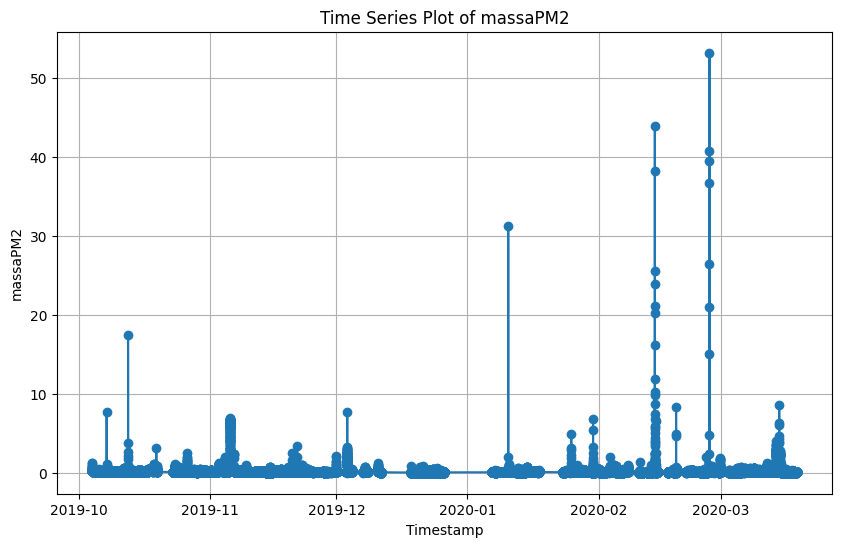

In [5]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['massaPM2'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('massaPM2')
plt.title('Time Series Plot of massaPM2')
plt.grid(True)
plt.show()

In [7]:
output_path = 'data_clean_col2.csv'
df.to_csv(output_path, index=False)

Finished the massaPM2 clean process

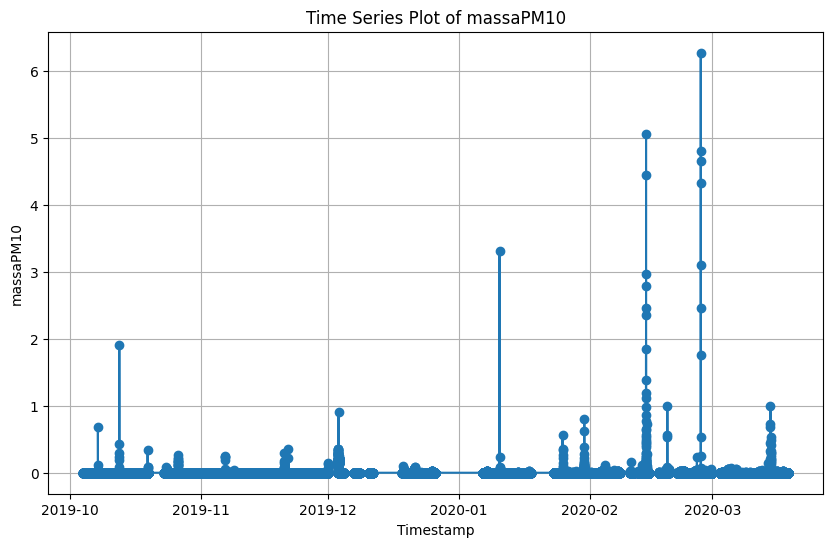

In [14]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['massaPM10'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('massaPM10')
plt.title('Time Series Plot of massaPM10')
plt.grid(True)
plt.show()

In [11]:
def clean_abnormaly(df, anomaly_value,column_name):
    df_cleaned = df.copy()

    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    anomaly_indices = df_cleaned.index[df_cleaned[column_name] == anomaly_value]
        
    for idx in anomaly_indices:
        # Get the column_name of the previous and next rows
        prev = df_cleaned.loc[df_cleaned.index < idx, column_name].iloc[-1] if idx > df_cleaned.index[0] else np.nan
        next = df_cleaned.loc[df_cleaned.index > idx, column_name].iloc[0] if idx < df_cleaned.index[-1] else np.nan
        
        # Check if both prev_temp and next_temp are not equal to the anomaly value
        if prev != anomaly_value and next != anomaly_value:
            # Calculate the average, ignoring NaN values
            avg = np.nanmean([prev, next])
            
            # Replace the anomaly with the calculated average
            df_cleaned.at[idx, column_name] = avg
        # If either prev or next is the anomaly value, we skip this row
    return df_cleaned

In [9]:
df[df['massaPM10'] > 7.5]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
110810,165.48,24.9,21.115,102.65,16.44,1156.54,149.23,18.42,2.99,0.98,...,135,2.66,0.0,2020-02-14 07:28:00,1722,8.09,3.16,212.8,552.8,188


In [13]:
df = clean_abnormaly(df, 16.44,'massaPM10')

Finished the massaPM10 clean process

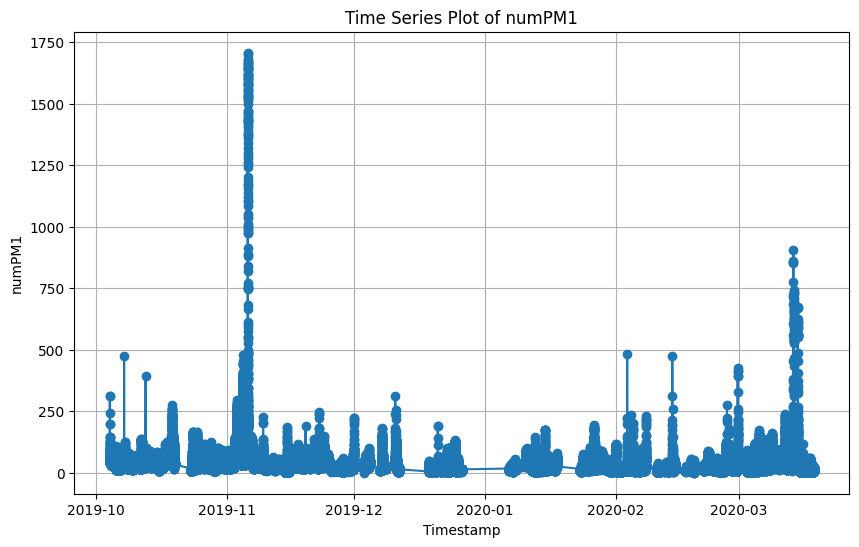

In [25]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['numPM1'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('numPM1')
plt.title('Time Series Plot of numPM1')
plt.grid(True)
plt.show()

In [24]:
df[df['numPM1'] > 850]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
35110,0.0,110.55,3.68,0.0,0.0,912.07,2.51,0.03,0.02,0.45,...,180,7.98,0.0,2019-11-05 20:21:00,0,0.08,0.0,209.0,36.2,0
35111,0.0,118.36,3.94,0.0,0.0,976.51,2.68,0.04,0.03,0.45,...,135,19.95,0.0,2019-11-05 20:22:00,0,0.08,0.0,209.0,36.2,0
35112,0.0,122.54,4.08,0.0,0.0,1010.94,2.78,0.04,0.03,0.50,...,45,15.96,0.0,2019-11-05 20:23:00,0,0.08,0.0,209.0,36.2,0
35113,0.0,121.27,4.04,0.0,0.0,1000.53,2.75,0.04,0.03,0.45,...,225,10.64,0.0,2019-11-05 20:24:00,0,0.08,0.0,209.0,36.2,0
35114,0.0,119.54,3.98,0.0,0.0,986.18,2.71,0.04,0.03,0.46,...,90,9.31,0.0,2019-11-05 20:25:00,0,0.08,0.0,209.0,36.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35199,0.0,106.93,3.56,0.0,0.0,882.21,2.42,0.03,0.02,0.47,...,45,15.96,0.0,2019-11-05 21:51:00,0,0.08,0.0,209.0,37.6,0
136303,0.0,104.34,3.47,0.0,0.0,860.84,2.37,0.03,0.02,0.49,...,45,26.60,0.0,2020-03-13 22:54:00,0,0.09,0.0,212.6,37.7,0
136304,0.0,109.97,3.66,0.0,0.0,907.26,2.49,0.03,0.02,0.50,...,135,9.31,0.0,2020-03-13 22:55:00,0,0.09,0.0,212.6,37.7,0
136305,0.0,104.08,3.47,0.0,0.0,858.69,2.36,0.03,0.02,0.50,...,90,14.63,0.0,2020-03-13 22:56:00,0,0.09,0.0,212.6,37.9,0


In [23]:
df = clean_abnormaly(df, 1156.54,'numPM1')
df = clean_abnormaly(df, 930.33,'numPM1')


Finished the numPM1 clean process

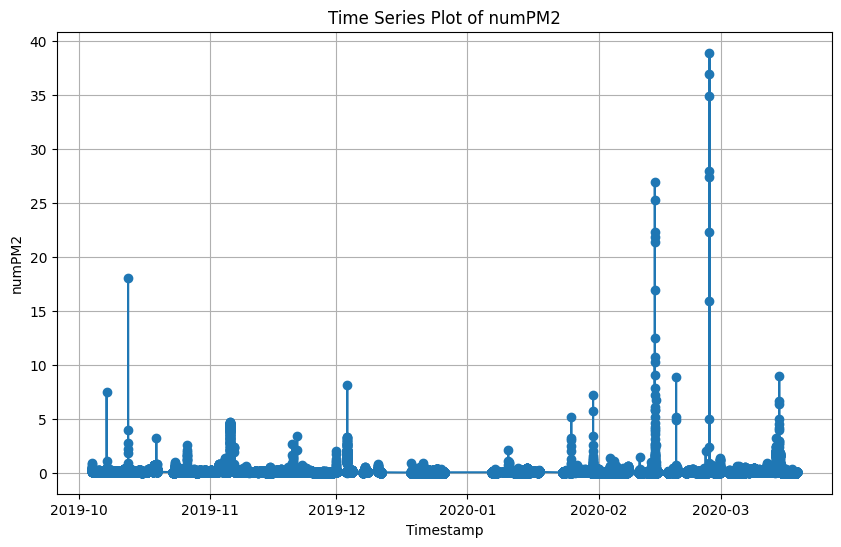

In [36]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['numPM2'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('numPM2')
plt.title('Time Series Plot of numPM2')
plt.grid(True)
plt.show()

In [35]:
df[df['numPM2'] > 40]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR


In [34]:
values_to_clean = [149.23, 31.96, 56.48,40.40,46.29	,43.21,41.92]

for value in values_to_clean:
    df = clean_abnormaly(df, value, 'numPM2')

Finished the numPM2 clean process

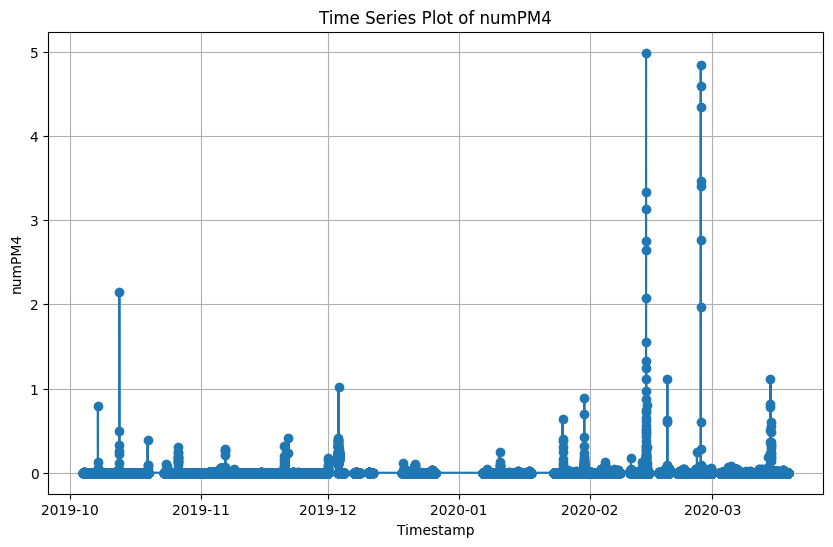

In [51]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['numPM4'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('numPM4')
plt.title('Time Series Plot of numPM4')
plt.grid(True)
plt.show()

In [44]:
df[df['numPM4'] > 3]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
80382,193.25,4.54,31.25,20.67,3.31,36.045,1.1050,3.740,0.62,0.73,...,225,10.64,0.0,2020-01-10 15:35:00,1752,8.32,3.28,210.8,541.9,199
110807,157.54,30.28,25.53,18.54,2.97,212.810,26.9600,3.330,0.54,0.92,...,90,6.65,0.0,2020-02-14 07:25:00,1566,7.36,2.89,212.9,554.9,167
110808,163.49,27.58,23.95,17.42,2.79,192.780,25.3100,3.130,0.51,0.97,...,90,10.64,0.0,2020-02-14 07:26:00,1602,7.55,2.94,212.8,554.7,178
110811,165.48,44.61,38.24,27.79,4.45,312.560,21.8425,4.990,0.81,0.94,...,45,11.97,0.0,2020-02-14 07:29:00,1788,8.46,3.28,211.6,552.9,196
110816,201.19,65.17,43.98,31.62,5.06,474.490,3.0950,5.680,0.92,0.85,...,135,13.30,0.0,2020-02-14 07:34:00,1936,9.15,3.56,211.7,554.2,211
120644,0.00,23.92,26.39,19.35,3.10,158.690,27.9700,3.470,0.56,1.04,...,180,0.00,0.0,2020-02-27 05:54:00,189,0.88,0.40,216.8,533.0,30
120645,0.00,33.98,40.73,29.94,4.80,220.510,34.9450,5.370,0.87,1.17,...,180,0.00,0.0,2020-02-27 05:55:00,200,0.94,0.42,216.6,535.9,31
120646,0.00,32.89,39.51,29.05,4.65,213.340,36.9375,5.210,0.84,1.13,...,180,0.00,0.0,2020-02-27 05:56:00,213,1.00,0.45,216.7,544.9,31
120647,0.00,31.39,36.70,26.96,4.32,205.070,38.9300,4.840,0.78,1.16,...,180,0.00,0.0,2020-02-27 05:57:00,225,1.05,0.46,216.4,545.2,33
120648,0.00,42.76,53.22,39.16,6.27,274.530,27.4300,3.405,1.14,1.23,...,180,0.00,0.0,2020-02-27 05:58:00,237,1.12,0.48,216.4,551.0,39


In [52]:
values_to_clean = [18.42,7.02,3.740,5.680, 5.370,5.210 ]

for value in values_to_clean:
    df = clean_abnormaly(df, value, 'numPM4')

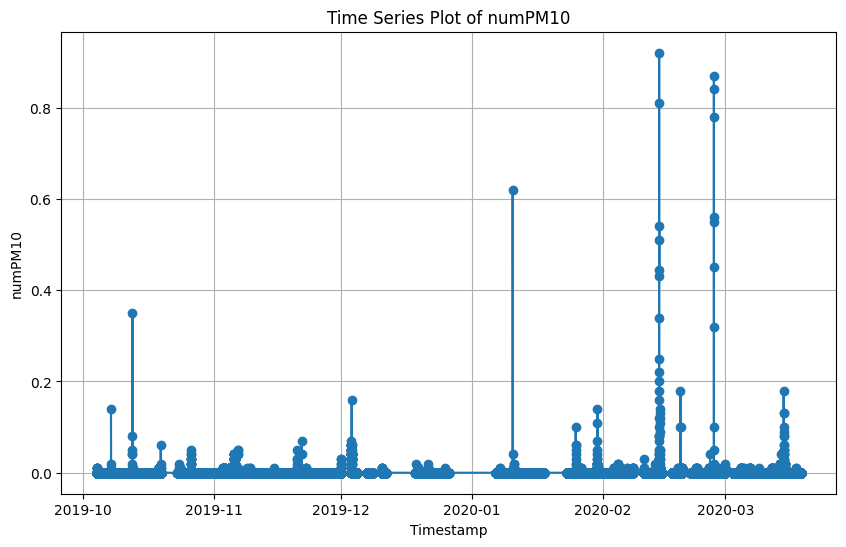

In [56]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['numPM10'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('numPM10')
plt.title('Time Series Plot of numPM10')
plt.grid(True)
plt.show()

In [54]:
df[df['numPM10'] > 1]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
110810,165.48,24.90,21.115,102.65,2.455,174.795,22.305,2.755,2.99,0.98,...,135,2.66,0.0,2020-02-14 07:28:00,1722,8.09,3.16,212.8,552.8,188
120648,0.00,42.76,53.220,39.16,6.270,274.530,27.430,3.405,1.14,1.23,...,180,0.00,0.0,2020-02-27 05:58:00,237,1.12,0.48,216.4,551.0,39


In [55]:
values_to_clean = [2.99, 1.14]

for value in values_to_clean:
    df = clean_abnormaly(df, value, 'numPM10')

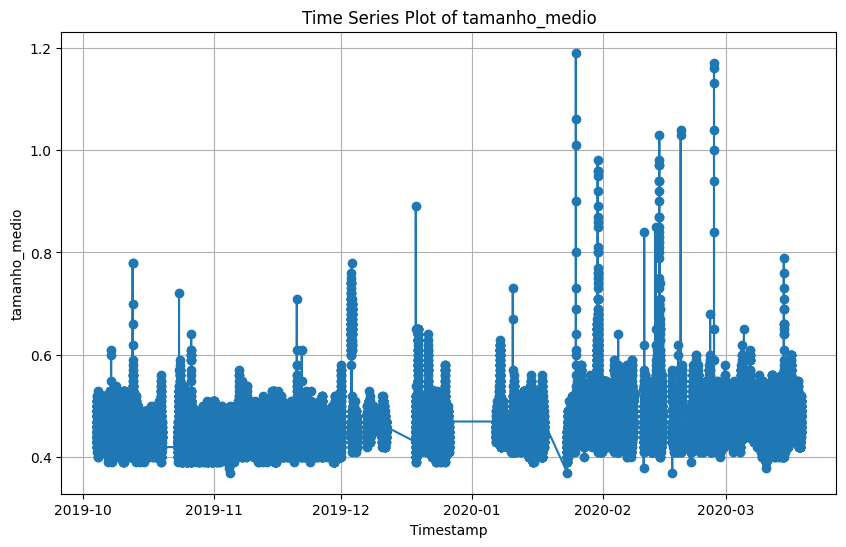

In [74]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['tamanho_medio'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('tamanho_medio')
plt.title('Time Series Plot of tamanho_medio')
plt.grid(True)
plt.show()

In [69]:
df[df['tamanho_medio'] > 1.2]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
114029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.63,...,180,0.0,0.0,2020-02-19 07:58:00,8127,38.19,14.81,212.8,561.7,1064
114030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.63,...,225,0.0,0.0,2020-02-19 08:19:00,4383,21.17,9.31,208.9,484.8,557


In [63]:
values_to_clean = [1.63, 1.43, 1.23]

for value in values_to_clean:
    df = clean_abnormaly(df, value, 'tamanho_medio')

In [72]:
def clean_two_consecutive(df, anomaly_value, column_name):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
    
    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp')
    
    # Reset index to ensure continuous integer indexing
    df_cleaned = df_cleaned.reset_index(drop=True)
    
    # Iterate through the dataframe
    i = 0
    while i < len(df_cleaned) - 1:
        if df_cleaned.at[i, column_name] == anomaly_value and df_cleaned.at[i+1, column_name] == anomaly_value:
            # Found two consecutive anomalies
            prev = df_cleaned.at[i-1, column_name] if i > 0 else np.nan
            next = df_cleaned.at[i+2, column_name] if i+2 < len(df_cleaned) else np.nan
            
            # Check if prev_temp and next_temp are not anomalies
            if prev != anomaly_value and next != anomaly_value:
                avg = np.nanmean([prev, next])
                df_cleaned.at[i, column_name] = avg
                df_cleaned.at[i+1, column_name] = avg
            
            i += 2  # Skip the next row as we've already processed it
        else:
            i += 1
    
    return df_cleaned



In [73]:
values_to_clean = [1.63]

for value in values_to_clean:
    df = clean_two_consecutive(df, value, 'tamanho_medio')

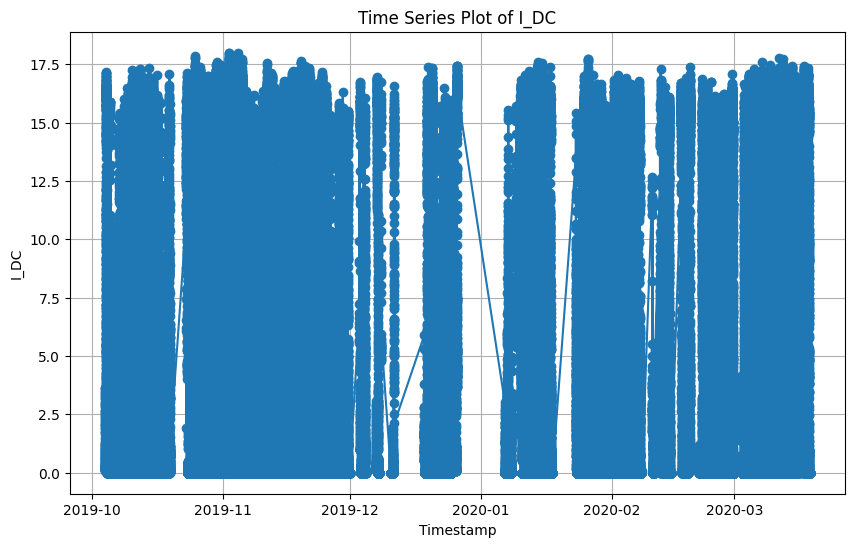

In [119]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['I_DC'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('I_DC')
plt.title('Time Series Plot of I_DC')
plt.grid(True)
plt.show()

In [90]:
df[df['I_DC'] > 71]

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
20281,0.0,3.08,0.10,0.0,0.0,25.39,0.07,0.0,0.0,0.43,...,90,11.97,0.0,2019-10-25 01:00:00,0,0.0,5.093183e+58,1.061391e+92,0.0,0
102801,0.0,2.34,0.08,0.0,0.0,19.29,0.05,0.0,0.0,0.46,...,180,3.99,0.0,2020-02-04 00:56:00,0,0.0,4.866943e+11,3.848192e+06,0.0,0


In [93]:
values_to_clean = [5.093183180494056e+58, 486694269261.19]

for value in values_to_clean:
    df = clean_abnormaly(df, value, 'I_DC')

end of I_DC

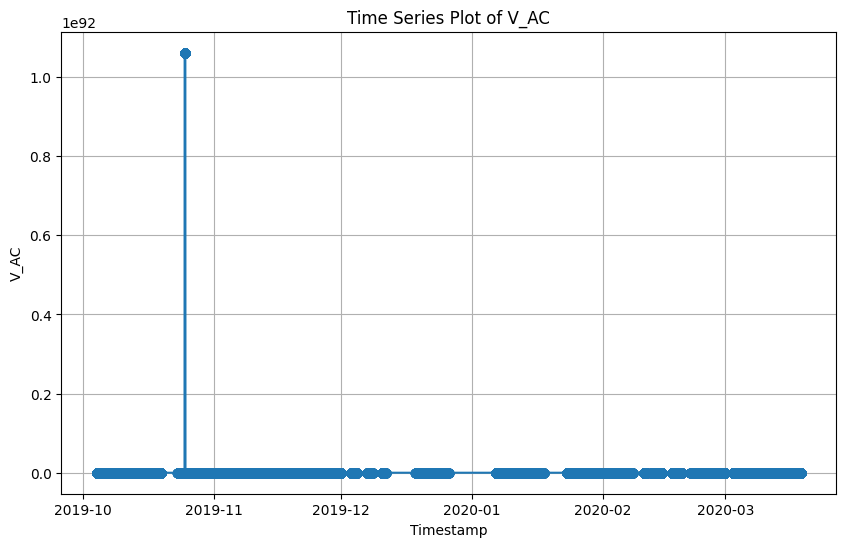

In [121]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['V_AC'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('V_AC')
plt.title('Time Series Plot of V_AC')
plt.grid(True)
plt.show()

This is to check the interval

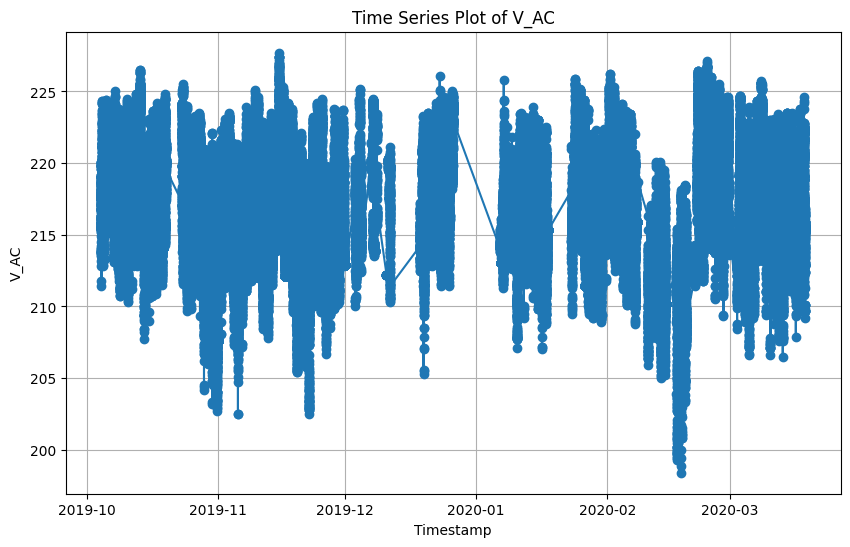

In [113]:
# Ensure the timestamp column is in datetime format
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_clean['timestamp'], df_clean['V_AC'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('V_AC')
plt.title('Time Series Plot of V_AC')
plt.grid(True)
plt.show()

In [112]:
df_clean = df[df['V_AC'] < 230]
df_clean = df_clean[df_clean['V_AC'] > 100]
df_clean

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
0,0.0,6.73,0.22,0.0,0.0,55.55,0.15,0.0,0.0,0.46,...,90,0.00,0.0,2019-10-04 05:21:00,9,0.10,0.09,220.0,461.7,6
1,0.0,6.71,0.22,0.0,0.0,55.37,0.15,0.0,0.0,0.48,...,90,0.00,0.0,2019-10-04 05:22:00,12,0.10,0.10,220.1,440.0,6
2,0.6,7.76,0.26,0.0,0.0,64.05,0.18,0.0,0.0,0.46,...,90,0.00,0.0,2019-10-04 05:23:00,19,0.12,0.10,218.7,481.5,6
3,0.0,6.52,0.22,0.0,0.0,53.81,0.15,0.0,0.0,0.47,...,90,0.00,0.0,2019-10-04 05:24:00,27,0.15,0.12,218.8,466.9,7
4,0.0,7.16,0.24,0.0,0.0,59.11,0.16,0.0,0.0,0.50,...,90,0.00,0.0,2019-10-04 05:25:00,33,0.18,0.13,218.3,482.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142280,0.0,2.49,0.08,0.0,0.0,20.51,0.06,0.0,0.0,0.48,...,180,0.00,0.0,2020-03-18 20:50:00,0,0.11,0.00,215.4,39.8,0
142281,0.0,2.29,0.08,0.0,0.0,18.93,0.05,0.0,0.0,0.46,...,180,0.00,0.0,2020-03-18 20:51:00,0,0.11,0.00,215.4,39.8,0
142282,0.0,2.23,0.07,0.0,0.0,18.42,0.05,0.0,0.0,0.46,...,45,6.65,0.0,2020-03-18 20:52:00,0,0.11,0.00,215.4,39.8,0
142283,0.0,2.57,0.09,0.0,0.0,21.17,0.06,0.0,0.0,0.47,...,45,3.99,0.0,2020-03-18 20:53:00,0,0.11,0.00,215.4,39.8,0


In [118]:
df_clean.describe()

,irr,massaPM1,massaPM2,massaPM4,massaPM10,numPM1,numPM2,numPM4,numPM10,tamanho_medio,...,vento_dir,vento_vel,rainfall,timestamp,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
count,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,...,133914.000000,133914.000000,133914.000000,133914,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000,133914.000000
mean,200.831395,3.809838,0.135708,0.007379,0.001074,31.418632,0.094928,0.001264,0.000258,0.456321,...,132.737727,8.942505,0.550671,2019-12-24 00:48:03.031497984,2395.719275,11.005156,4.615274,215.964379,367.033092,291.101326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370000,...,0.000000,0.000000,0.000000,2019-10-04 05:21:00,0.000000,0.060000,0.000000,198.400000,6.400000,0.000000
25%,0.000000,1.640000,0.060000,0.000000,0.000000,13.550000,0.040000,0.000000,0.000000,0.440000,...,45.000000,2.660000,0.000000,2019-11-07 00:16:15,0.000000,0.100000,0.000000,213.800000,43.500000,0.000000
50%,0.000000,2.820000,0.090000,0.000000,0.000000,23.250000,0.060000,0.000000,0.000000,0.450000,...,135.000000,7.980000,0.000000,2019-12-21 06:59:30,854.000000,3.990000,1.640000,215.600000,510.200000,103.000000
75%,292.760000,4.510000,0.150000,0.000000,0.000000,37.220000,0.100000,0.000000,0.000000,0.470000,...,225.000000,13.300000,0.000000,2020-02-07 17:59:45,4392.000000,20.240000,8.300000,218.100000,539.800000,493.000000
max,1536.510000,206.960000,53.220000,102.650000,6.270000,1707.490000,38.930000,4.990000,0.920000,1.190000,...,335.000000,150.290000,89.500000,2020-03-18 20:54:00,8493.000000,38.360000,17.990000,227.700000,666.800000,1382.000000
std,329.860051,5.777933,0.410643,0.383217,0.042350,47.641504,0.326355,0.038909,0.007313,0.030225,...,95.707328,8.728947,3.882465,NaN,2929.797338,13.311501,5.678289,3.356243,228.930122,369.784856


end of checking start to clean

In [127]:
import pandas as pd
import numpy as np

def clean_v_ac(df, min_v_ac=100, max_v_ac=230):
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Convert timestamp to datetime if it's not already
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
    
    # Sort the dataframe by timestamp to ensure correct order
    df_cleaned = df_cleaned.sort_values('timestamp').reset_index(drop=True)
    
    def is_valid(value):
        try:
            value = float(value)
            return min_v_ac < value < max_v_ac
        except ValueError:
            return False

    # Function to find the average of nearest valid previous and next values
    def find_average_valid(index):
        prev_index = index - 1
        next_index = index + 1
        
        while prev_index >= 0 and not is_valid(df_cleaned.at[prev_index, 'V_AC']):
            prev_index -= 1
        
        while next_index < len(df_cleaned) and not is_valid(df_cleaned.at[next_index, 'V_AC']):
            next_index += 1
        
        prev_value = float(df_cleaned.at[prev_index, 'V_AC']) if prev_index >= 0 else np.nan
        next_value = float(df_cleaned.at[next_index, 'V_AC']) if next_index < len(df_cleaned) else np.nan
        
        return np.nanmean([prev_value, next_value])

    # Clean the V_AC column
    for i in range(len(df_cleaned)):
        if not is_valid(df_cleaned.at[i, 'V_AC']):
            df_cleaned.at[i, 'V_AC'] = find_average_valid(i)
    
    # Round V_AC values to 2 decimal places
    df_cleaned['V_AC'] = df_cleaned['V_AC'].apply(lambda x: round(float(x), 2) if pd.notnull(x) else x)
    
    return df_cleaned



# Clean the V_AC data
df_cleaned = clean_v_ac(df)


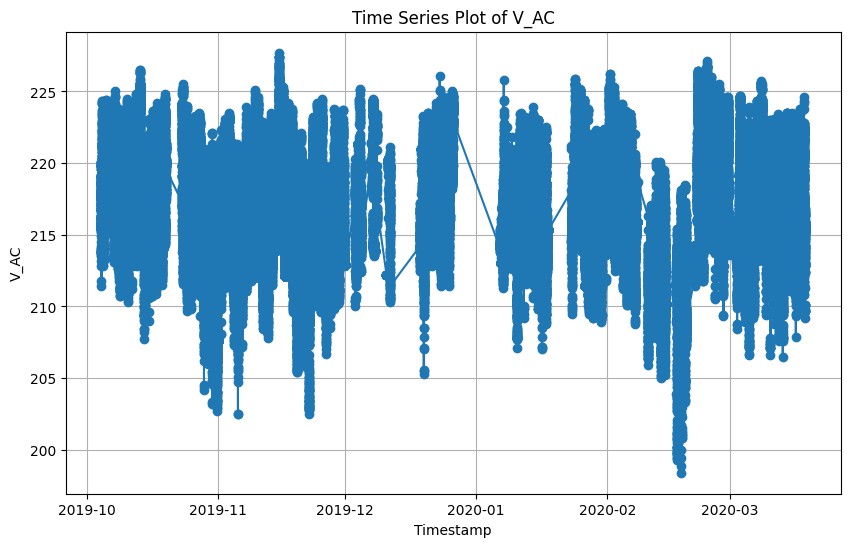

In [128]:
# Ensure the timestamp column is in datetime format
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['timestamp'], df_cleaned['V_AC'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('V_AC')
plt.title('Time Series Plot of V_AC')
plt.grid(True)
plt.show()

V_DC and IRR is good

In [129]:
output_path = 'finish_clean.csv'
df_cleaned.to_csv(output_path, index=False)

In [131]:
import pandas as pd
df = df_cleaned
# Assuming your data is in a DataFrame called 'df' with a 'timestamp' column
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['minute'] = pd.to_datetime(df['timestamp']).dt.minute

# Count records per day
daily_counts = df['date'].value_counts()

# Count unique minutes per day
unique_minutes_per_day = df.groupby('date')['minute'].nunique()

# Combine the information
completeness_info = pd.DataFrame({
    'total_records': daily_counts,
    'unique_minutes': unique_minutes_per_day
})

# Sort by total_records and unique_minutes
completeness_info = completeness_info.sort_values(['total_records', 'unique_minutes'], ascending=False)

print(completeness_info)

            total_records  unique_minutes
date                                     
2019-11-13           1435              60
2020-02-04           1435              60
2020-01-07           1433              60
2020-01-11           1433              60
2019-10-17           1432              60
...                   ...             ...
2020-02-11            223              60
2020-01-09             96              57
2019-12-08             60              59
2019-12-01             57              57
2020-02-08             56              55

[134 rows x 2 columns]


show total rows in each day

In [173]:
# pd.set_option('display.max_rows', None)

# Sort by total_records and unique_minutes
completeness_info = completeness_info.sort_values(['total_records', 'unique_minutes'], ascending=False)

# Display the DataFrame
print(completeness_info)

            total_records  unique_minutes
date                                     
2019-11-13           1435              60
2020-02-04           1435              60
2020-01-07           1433              60
2020-01-11           1433              60
2019-10-17           1432              60
...                   ...             ...
2020-02-11            223              60
2020-01-09             96              57
2019-12-08             60              59
2019-12-01             57              57
2020-02-08             56              55

[134 rows x 2 columns]


Time series for visual

In [22]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your data
df = pd.read_csv('final_complete_data.csv')
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# 2020-02-14 good dust
# Select a specific day (you can change this to any day you're interested in)
specific_date = '2019-11-27'  # Replace with the date you want to visualize
df_day = df[df['timestamp'].dt.date == pd.to_datetime(specific_date).date()]

# Get list of variables (columns) excluding 'timestamp'
variables = [col for col in df_day.columns if col != 'timestamp']
#variables = ['irr', 'rainfall' , 'temp']
#variables = ['IRR', 'tamanho_medio', 'massaPM1', 'massaPM2', 'massaPM4','massaPM10']



# Create subplots
fig = make_subplots(rows=len(variables), cols=1, 
                    subplot_titles=variables,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

# Add traces for each variable
for i, var in enumerate(variables, start=1):
    fig.add_trace(
        go.Scatter(x=df_day['timestamp'], y=df_day[var], name=var),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=300*len(variables), 
                  title_text=f"Time Series for {specific_date}",
                  showlegend=False)

# Update x-axis
fig.update_xaxes(title_text="Time", row=len(variables), col=1)

# Show plot
fig.show()


Days with rainfall

In [157]:
import pandas as pd
import plotly.graph_objects as go


# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a date column
df['date'] = df['timestamp'].dt.date

# Group by date and sum the rainfall for each day
daily_rainfall = df.groupby('date')['rainfall'].sum().reset_index()

# Filter out days with no rainfall
rainy_days = daily_rainfall[daily_rainfall['rainfall'] > 0]

# Sort by date
rainy_days = rainy_days.sort_values('date')

# Create the plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=rainy_days['date'],
    y=rainy_days['rainfall'],
    name='Rainfall'
))

# Update layout
fig.update_layout(
    title='Days with Rainfall',
    xaxis_title='Date',
    yaxis_title='Total Rainfall',
    barmode='stack'
)

# Show plot
fig.show()


# Print the rainy days
print("Days with rainfall:")
for _, row in rainy_days.iterrows():
    print(f"Date: {row['date']}, Rainfall: {row['rainfall']:.2f}")

Days with rainfall:
Date: 2019-10-04, Rainfall: 272.25
Date: 2019-10-06, Rainfall: 4026.00
Date: 2019-10-10, Rainfall: 450.75
Date: 2019-10-11, Rainfall: 5656.75
Date: 2019-10-12, Rainfall: 723.25
Date: 2019-10-13, Rainfall: 5596.75
Date: 2019-10-15, Rainfall: 1045.75
Date: 2019-10-19, Rainfall: 961.25
Date: 2019-11-04, Rainfall: 12.50
Date: 2019-11-14, Rainfall: 76.50
Date: 2019-11-16, Rainfall: 215.00
Date: 2019-11-22, Rainfall: 358.50
Date: 2019-11-23, Rainfall: 428.75
Date: 2019-11-24, Rainfall: 429.25
Date: 2019-11-25, Rainfall: 813.00
Date: 2019-11-26, Rainfall: 6945.75
Date: 2019-11-27, Rainfall: 30239.25
Date: 2019-11-28, Rainfall: 9824.25
Date: 2019-11-29, Rainfall: 3192.00
Date: 2019-11-30, Rainfall: 3177.50
Date: 2019-12-01, Rainfall: 267.75
Date: 2019-12-03, Rainfall: 184.00
Date: 2019-12-10, Rainfall: 1.00
Date: 2019-12-18, Rainfall: 33.50


Top 20 days with highest total irradiance

In [20]:
import pandas as pd
import plotly.graph_objects as go

# Load your data

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a date column
df['date'] = df['timestamp'].dt.date

# Group by date and sum the irradiance for each day
daily_irr = df.groupby('date')['IRR'].sum().reset_index()

# Sort by total daily irradiance in descending order
daily_irr_sorted = daily_irr.sort_values('IRR', ascending=False)

# Take top 20 days for visualization (you can adjust this number)
top_irr_days = daily_irr_sorted.head(20)

# Create the plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_irr_days['date'],
    y=top_irr_days['IRR'],
    name='Irradiance'
))

# Update layout
fig.update_layout(
    title='Top 20 Days with Highest Total Irradiance',
    xaxis_title='Date',
    yaxis_title='Total Daily Irradiance',
    barmode='stack'
)

# Show plot
fig.show()


# Print the top irradiance days
print("Top 20 days with highest total irradiance:")
for _, row in top_irr_days.iterrows():
    print(f"Date: {row['date']}, Total Irradiance: {row['IRR']:.2f}")

Top 20 days with highest total irradiance:
Date: 2019-11-16, Total Irradiance: 480272.00
Date: 2019-11-17, Total Irradiance: 478127.00
Date: 2020-02-29, Total Irradiance: 473477.00
Date: 2019-11-20, Total Irradiance: 472318.00
Date: 2020-03-16, Total Irradiance: 451557.00
Date: 2020-02-27, Total Irradiance: 450669.00
Date: 2019-10-27, Total Irradiance: 450421.00
Date: 2020-01-26, Total Irradiance: 446149.00
Date: 2020-03-10, Total Irradiance: 441725.00
Date: 2019-11-01, Total Irradiance: 440860.00
Date: 2019-10-25, Total Irradiance: 439968.00
Date: 2020-03-09, Total Irradiance: 439910.00
Date: 2019-10-30, Total Irradiance: 436876.00
Date: 2019-10-28, Total Irradiance: 436729.00
Date: 2020-02-22, Total Irradiance: 433984.00
Date: 2019-12-20, Total Irradiance: 431194.00
Date: 2020-01-14, Total Irradiance: 428793.00
Date: 2020-02-04, Total Irradiance: 428339.00
Date: 2020-01-15, Total Irradiance: 428279.00
Date: 2020-03-18, Total Irradiance: 426304.00


Top 20 Days with Highest Total tamanho_medio

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Load your data

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a date column
df['date'] = df['timestamp'].dt.date

# Group by date and sum the irradiance for each day
daily_irr = df.groupby('date')['tamanho_medio'].sum().reset_index()

# Sort by total daily irradiance in descending order
daily_irr_sorted = daily_irr.sort_values('tamanho_medio', ascending=False)

# Take top 20 days for visualization (you can adjust this number)
top_irr_days = daily_irr_sorted.head(20)

# Create the plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_irr_days['date'],
    y=top_irr_days['tamanho_medio'],
    name='tamanho_medio'
))

# Update layout
fig.update_layout(
    title='Top 20 Days with Highest Total tamanho_medio',
    xaxis_title='Date',
    yaxis_title='Total Daily tamanho_medio',
    barmode='stack'
)

# Show plot
fig.show()


# Print the top tamanho_medio days
print("Top 20 days with highest total tamanho_medio:")
for _, row in top_irr_days.iterrows():
    print(f"Date: {row['date']}, Total tamanho_medio: {row['tamanho_medio']:.2f}")

Top 20 days with highest total tamanho_medio:
Date: 2020-01-07, Total tamanho_medio: 681.08
Date: 2020-03-15, Total tamanho_medio: 673.69
Date: 2020-02-14, Total tamanho_medio: 669.80
Date: 2020-02-04, Total tamanho_medio: 661.41
Date: 2019-12-19, Total tamanho_medio: 656.39
Date: 2020-01-11, Total tamanho_medio: 655.64
Date: 2020-03-14, Total tamanho_medio: 646.09
Date: 2020-01-12, Total tamanho_medio: 645.51
Date: 2019-10-12, Total tamanho_medio: 643.28
Date: 2019-11-20, Total tamanho_medio: 640.76
Date: 2019-11-10, Total tamanho_medio: 640.55
Date: 2019-10-17, Total tamanho_medio: 638.50
Date: 2019-10-11, Total tamanho_medio: 637.12
Date: 2019-10-26, Total tamanho_medio: 637.06
Date: 2019-11-13, Total tamanho_medio: 636.56
Date: 2020-01-15, Total tamanho_medio: 635.74
Date: 2019-12-24, Total tamanho_medio: 635.41
Date: 2019-11-07, Total tamanho_medio: 632.22
Date: 2019-10-18, Total tamanho_medio: 628.33
Date: 2019-10-27, Total tamanho_medio: 626.57


This is to rearrange the data column

In [18]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('./finish_clean.csv')

# Drop the first 'irr' column
df = df.drop(columns=['irr'])

# Reorder the columns
new_order = ['timestamp', 'IRR', 'massaPM1', 'massaPM2', 'massaPM4', 'massaPM10', 
             'numPM1', 'numPM2', 'numPM4', 'numPM10', 'tamanho_medio', 'temp', 
             'vento_dir', 'vento_vel', 'rainfall', 'P_AC', 'I_AC', 'I_DC', 'V_AC', 'V_DC']

df = df[new_order]

# Save the transformed data to a new CSV file
df.to_csv('final_complete_data.csv', index=False)

print(df.head())

             timestamp  IRR  massaPM1  massaPM2  massaPM4  massaPM10  numPM1  \
0  2019-10-04 05:21:00    6      6.73      0.22       0.0        0.0   55.55   
1  2019-10-04 05:22:00    6      6.71      0.22       0.0        0.0   55.37   
2  2019-10-04 05:23:00    6      7.76      0.26       0.0        0.0   64.05   
3  2019-10-04 05:24:00    7      6.52      0.22       0.0        0.0   53.81   
4  2019-10-04 05:25:00    7      7.16      0.24       0.0        0.0   59.11   

   numPM2  numPM4  numPM10  tamanho_medio   temp  vento_dir  vento_vel  \
0    0.15     0.0      0.0           0.46  21.19         90        0.0   
1    0.15     0.0      0.0           0.48  21.25         90        0.0   
2    0.18     0.0      0.0           0.46  21.38         90        0.0   
3    0.15     0.0      0.0           0.47  21.50         90        0.0   
4    0.16     0.0      0.0           0.50  21.69         90        0.0   

   rainfall  P_AC  I_AC  I_DC   V_AC   V_DC  
0       0.0     9  0.10  0.0

Generate daily file

In [25]:
import pandas as pd
from datetime import datetime

# Read the CSV file
df = pd.read_csv('final_complete_data.csv')

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Choose a specific date (let's say October 4, 2019)
target_date = '2020-02-14'

# Filter the dataframe for the chosen date
one_day_df = df[df['timestamp'].dt.date == datetime.strptime(target_date, '%Y-%m-%d').date()]

# Reorder the columns as per your specification
new_order = ['timestamp', 'IRR', 'massaPM1', 'massaPM2', 'massaPM4', 'massaPM10', 
             'numPM1', 'numPM2', 'numPM4', 'numPM10', 'tamanho_medio', 'temp', 
             'vento_dir', 'vento_vel', 'rainfall', 'P_AC', 'I_AC', 'I_DC', 'V_AC', 'V_DC']

one_day_df = one_day_df[new_order]

# Save the one-day dataset to a new CSV file
output_filename = f'{target_date}_dust.csv'
one_day_df.to_csv(output_filename, index=False)

print(f"One-day dataset saved as {output_filename}")
print(one_day_df.head())

One-day dataset saved as 2020-02-14_dust.csv
                 timestamp  IRR  massaPM1  massaPM2  massaPM4  massaPM10  \
110364 2020-02-14 00:01:00    0      1.77      0.06       0.0        0.0   
110365 2020-02-14 00:02:00    0      1.88      0.06       0.0        0.0   
110366 2020-02-14 00:03:00    0      2.00      0.07       0.0        0.0   
110367 2020-02-14 00:04:00    0      1.83      0.06       0.0        0.0   
110368 2020-02-14 00:05:00    0      2.05      0.07       0.0        0.0   

        numPM1  numPM2  numPM4  numPM10  tamanho_medio   temp  vento_dir  \
110364   14.63    0.04     0.0      0.0           0.44  22.56        135   
110365   15.55    0.04     0.0      0.0           0.44  22.62         45   
110366   16.54    0.05     0.0      0.0           0.44  22.69        135   
110367   15.07    0.04     0.0      0.0           0.44  22.56          0   
110368   16.90    0.05     0.0      0.0           0.43  22.50          0   

        vento_vel  rainfall  P_AC  I_AC  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



# Construct the filename
filename = '2019-11-20_sun.csv'

# Read the CSV file
df = pd.read_csv(filename)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate statistics for IRR
irr_sum = df['IRR'].sum()
irr_mean = df['IRR'].mean()
irr_max = df['IRR'].max()
irr_min_nonzero = df[df['IRR'] > 0]['IRR'].min()
irr_nonzero_count = (df['IRR'] > 0).sum()

# Calculate statistics for P_AC
pac_sum = df['P_AC'].sum()
pac_mean = df['P_AC'].mean()
pac_max = df['P_AC'].max()
pac_min_nonzero = df[df['P_AC'] > 0]['P_AC'].min()
pac_nonzero_count = (df['P_AC'] > 0).sum()

# Print the results
print(f"Date: {target_date}")
print("\nIRR (Solar Irradiance) Statistics:")
print(f"Sum of IRR values: {irr_sum:.2f} W/m²")
print(f"Mean of IRR values: {irr_mean:.2f} W/m²")
print(f"Maximum IRR value: {irr_max:.2f} W/m²")
print(f"Minimum non-zero IRR value: {irr_min_nonzero:.2f} W/m²")
print(f"Number of non-zero IRR readings: {irr_nonzero_count}")

print("\nP_AC (AC Power) Statistics:")
print(f"Sum of P_AC values: {pac_sum:.2f} W")
print(f"Mean of P_AC values: {pac_mean:.2f} W")
print(f"Maximum P_AC value: {pac_max:.2f} W")
print(f"Minimum non-zero P_AC value: {pac_min_nonzero:.2f} W")
print(f"Number of non-zero P_AC readings: {pac_nonzero_count}")

# Create a plot of IRR and P_AC values over the day
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot IRR
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('IRR (W/m²)', color=color)
ax1.plot(df['timestamp'], df['IRR'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for P_AC
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('P_AC (W)', color=color)
ax2.plot(df['timestamp'], df['P_AC'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set title and adjust layout
plt.title(f'IRR and P_AC Values on {target_date}')
fig.tight_layout()

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2019-11-29_sun.csv'